# Interp 6: Test symmetries for trained models

In the previous notebook, to make target functions clear, we were inputing the symbolic formula. In practice, we want to apply symmetry testing and tree graph plotting to a trained model.

In [1]:
from kan.hypothesis import *
from kan import *

Example 1

In [2]:
f = lambda x: x[:,[0]] + torch.sin(torch.pi*x[:,[1]]) + x[:,[2]] ** 2
dataset = create_dataset(f, n_var=3)
model = KAN(width=[3,5,5,1], grid=5, k=3)

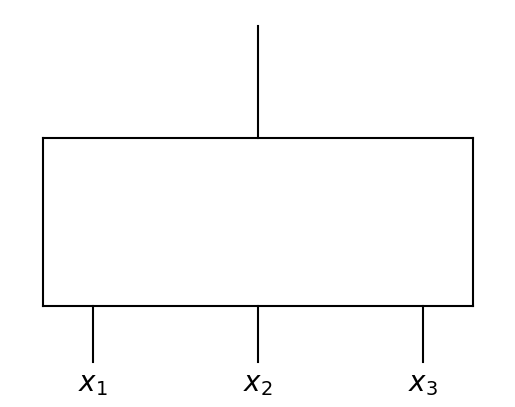

In [3]:
model(dataset['train_input'])
model.tree()

In [4]:
model.fit(dataset, steps=50);

train loss: 7.77e-04 | test loss: 1.13e-03 | reg: 2.02e+01 : 100%|██| 50/50 [01:03<00:00,  1.27s/it]


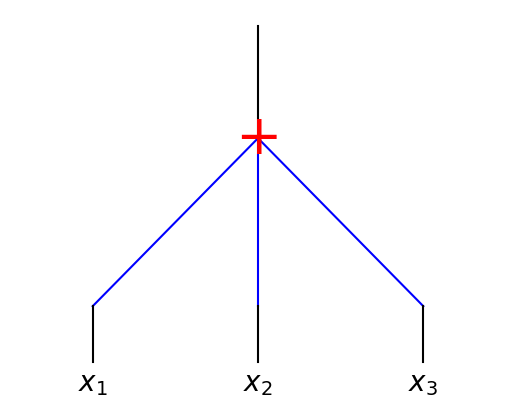

In [5]:
model.tree()

Example 2

In [6]:
f = lambda x: x[:,[0]] * x[:,[1]] * x[:,[2]] / x[:,[3]]
dataset = create_dataset(f, n_var=4, ranges=[0.5,2])
model = KAN(width=[4,5,5,1], grid=5, k=3)

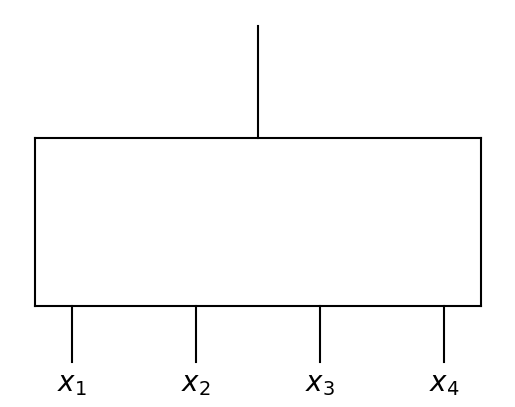

In [7]:
model(dataset['train_input'])
model.tree()

In [8]:
model.fit(dataset, steps=50);

train loss: 1.49e-03 | test loss: 3.76e-03 | reg: 2.94e+01 : 100%|██| 50/50 [01:17<00:00,  1.55s/it]


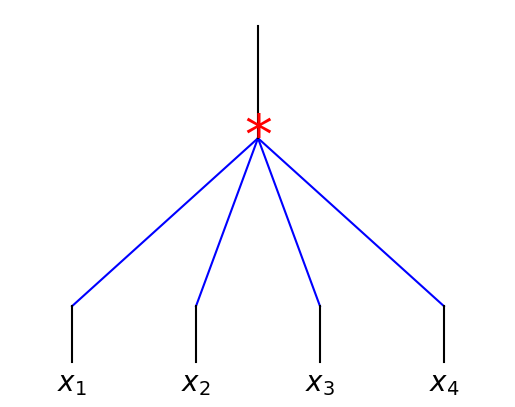

In [9]:
model.tree()

Example 3

In [10]:
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=2)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4)

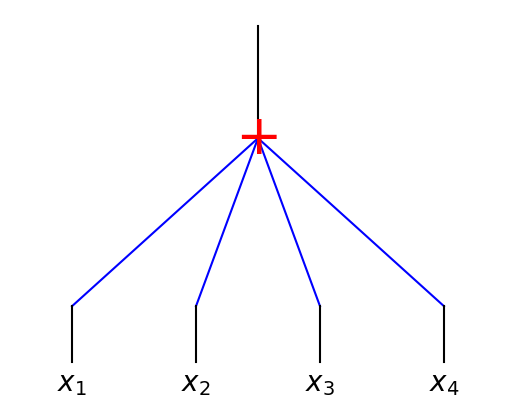

In [11]:
model(dataset['train_input'])
model.tree()

In [12]:
model.fit(dataset, steps=50);

train loss: 6.14e-03 | test loss: 6.70e-03 | reg: 7.63e+00 : 100%|██| 50/50 [00:20<00:00,  2.46it/s]


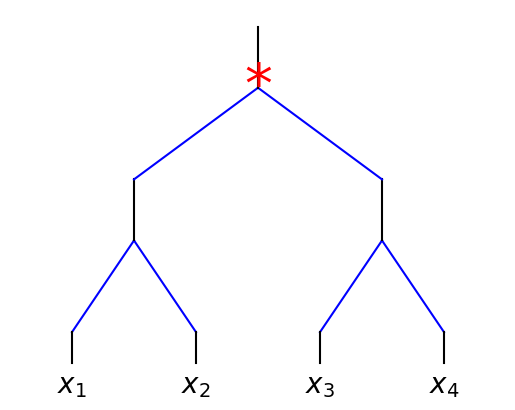

In [13]:
model.tree()

It doesn't always work. One may need to tweek seed (with unlucky random seed, it can get stuck at bad local minima)

In [14]:
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=4)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4)
model.fit(dataset, steps=50);

train loss: 2.86e-01 | test loss: 3.13e-01 | reg: 3.46e+01 : 100%|██| 50/50 [00:19<00:00,  2.51it/s]


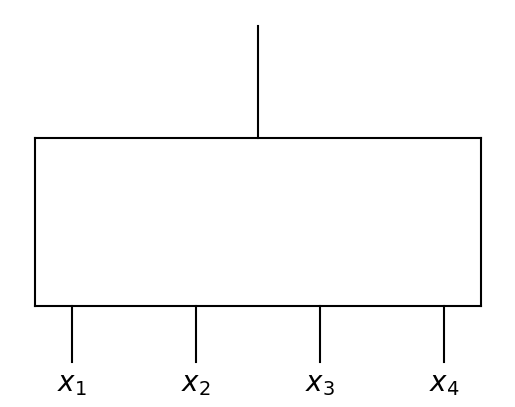

In [15]:
model.tree()